In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


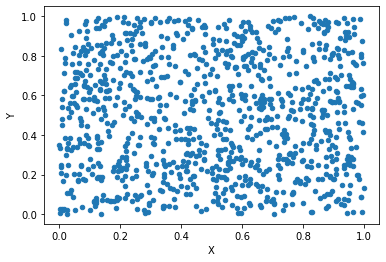

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:

X = np.random.uniform(0,1,1000)
X

array([9.78510626e-01, 7.58065292e-01, 2.28858527e-01, 6.39990274e-02,
       5.96185250e-01, 7.90181166e-01, 6.22816078e-01, 9.77503485e-01,
       5.49802153e-01, 8.45352373e-01, 4.63757050e-01, 5.41017176e-01,
       5.67219538e-01, 3.08515496e-01, 2.18375397e-02, 8.52537609e-01,
       1.32173935e-01, 9.19002686e-01, 4.45428455e-01, 4.84225041e-01,
       6.78824112e-02, 1.97233655e-01, 9.10898424e-01, 3.40136303e-01,
       3.65572339e-01, 7.58649277e-01, 8.82376503e-01, 5.04417813e-01,
       9.71937496e-01, 4.84519048e-02, 6.64268803e-01, 5.38570484e-01,
       3.92698279e-01, 2.32887817e-01, 7.16168876e-01, 1.18945902e-01,
       8.40785632e-01, 6.77907288e-01, 8.26539090e-01, 2.91458478e-01,
       2.06653237e-01, 6.70937670e-01, 4.81692212e-01, 1.18883266e-01,
       8.29759656e-02, 3.02201328e-02, 4.56958445e-01, 3.49186465e-01,
       5.03753452e-01, 1.07177103e-01, 7.13824955e-01, 9.33671318e-01,
       7.72779510e-02, 3.76959144e-01, 3.98902078e-01, 6.64719857e-01,
      

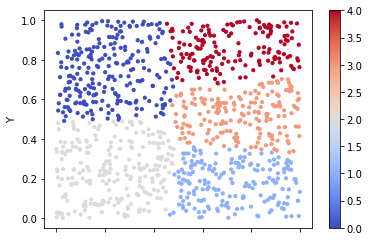

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [5]:
Univ = pd.read_csv("C:/Users/Anjali/OneDrive/Desktop/data science/Universities.csv.xls")

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([2, 3, 0, 4, 4, 2, 2, 4, 2, 3, 2, 4, 4, 1, 2, 1, 2, 1, 4, 0, 0, 4,
       4, 1, 2])

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [9]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1243.333333,67.333333,59.00,12.666667,26292.00,81.333333
1,1061.500000,38.750000,70.00,19.250000,9953.00,71.750000
2,1356.875000,91.125000,21.50,10.875000,33878.75,94.500000
3,1360.000000,87.500000,34.50,6.500000,61133.00,84.000000
4,1263.750000,81.375000,35.25,12.875000,21589.50,89.125000


In [10]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
